In [20]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from pymongo import MongoClient
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [10]:
query = 'S&P500 lang:en until:2022-11-01 since:2022-10-01'
tweets=[]
limit=100000000

In [11]:
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.user.username, tweet.content])
    
df = pd.DataFrame(tweets, columns=['Date','User', 'Tweet'])

In [13]:
pd.set_option('max_colwidth',1000)
df['Tweet'].head()

0                                                                                                                                                BRSCHULTZ SP500 GOLD WAVE BUST COUNT FULL PORTFOLIO… DAILY, 40MIN, 20MIN, &amp; TODAY THE 10MIN FORMED A 1,2,3 BUST COUNT FOR NOV 18/21 LOW https://t.co/h5baXInHSr
1    Will Atlantic Lithium LSE:ALL catch fire? - https://t.co/W1abaXwEHV -  #Gold #SP500\n\nOur fascination with Lithium batteries continues, most recently due to a little accident with the battery pack of a Bosch electric drill. As happens, the 14v drill needed a new battery pack... https://t.co/xDe8JRzqiU
2           @HGTPMichael Hell yea I I win 1 billion  well Ik that 40% tax gonna hit but 20million straight to crypto probably more lol knowing my self then the rest do like 5million get a financial advisor try real estate S&amp;p500 and other crap save the rest of the money until I made money from investing
3                                                                        

#### Clean text of tweets

In [17]:
def cleanTXT(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove @
    text = re.sub(r'#', '', text) # remove '#'
    text = re.sub(r'RT[\s]+', '', text) # remove RT
    text = re.sub(r'https?:\/\/\S+', '', text) # remove hyper link
    text = re.sub('\\n', '', text) # remove '\n'

    return text

df['Tweet'] = df['Tweet'].apply(cleanTXT)

df

,Date,User,Tweet
0,2022-10-31 23:59:32+00:00,brschultzgoldw1,"BRSCHULTZ SP500 GOLD WAVE BUST COUNT FULL PORTFOLIO… DAILY, 40MIN, 20MIN, &amp; TODAY THE 10MIN FORMED A 1,2,3 BUST COUNT FOR NOV 18/21 LOW"
1,2022-10-31 23:59:17+00:00,TrendsTargets,"Will Atlantic Lithium LSE:ALL catch fire? - - Gold SP500\n\nOur fascination with Lithium batteries continues, most recently due to a little accident with the battery pack of a Bosch electric drill. As happens, the 14v drill needed a new battery pack..."
2,2022-10-31 23:59:14+00:00,OpJony,Hell yea I I win 1 billion well Ik that 40% tax gonna hit but 20million straight to crypto probably more lol knowing my self then the rest do like 5million get a financial advisor try real estate S&amp;p500 and other crap save the rest of the money until I made money from investing
3,2022-10-31 23:57:35+00:00,Douche_Capital,So puts on S&amp;P500 got it.
4,2022-10-31 23:57:02+00:00,Danielle_Artist,I carved the scariest thing I could think of into my pumpkin!\nhorror Halloween SP500 pumpkincarving pumpkin inflation recession
...,...,...,...
23538,2022-10-01 00:05:14+00:00,yourfriendSOMMI,"yeah its more for swings , theres a little relief afterwards . doesnt give too much insight but could mean this S&amp;P500 bottom gets a fake-out .\n\nnext big news is US Fed meeting monday + US Jobs on next friday (if unemployment rate is higher, we get bid)"
23539,2022-10-01 00:05:01+00:00,MITickWatcher,Top stocks with TA score trending DOWN (SP500):\n$RF $ZION $CVS $FE $DVA $NRG $BK $IRM $CCL $MS $ALL $NOC $HBAN $SLB $FITB $MRO $GM $NCLH $SYK $SRE\n
23540,2022-10-01 00:05:00+00:00,MITickWatcher,Top stocks with TA score trending UP (SP500):\n$MNST $HOLX $FFIV $EXPD $MU $CP$KMX $HD $FMC $DGX $BRO $LOW $ADSK $VRSN $EBAY $ODFL $PKI $PKG $STE $LYB\n
23541,2022-10-01 00:03:39+00:00,DavidTaggart,Where will the SP500 and Oil be 3 months from now?\n\nParticipate in the weekly markets survey by clicking the link. Takes like 60ish seconds\n\n


In [21]:
# subjetividade
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# polaridade
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# 2 colunas novas
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

df

,Date,User,Tweet,Subjectivity,Polarity
0,2022-10-31 23:59:32+00:00,brschultzgoldw1,"BRSCHULTZ SP500 GOLD WAVE BUST COUNT FULL PORTFOLIO… DAILY, 40MIN, 20MIN, &amp; TODAY THE 10MIN FORMED A 1,2,3 BUST COUNT FOR NOV 18/21 LOW",0.283333,0.116667
1,2022-10-31 23:59:17+00:00,TrendsTargets,"Will Atlantic Lithium LSE:ALL catch fire? - - Gold SP500\n\nOur fascination with Lithium batteries continues, most recently due to a little accident with the battery pack of a Bosch electric drill. As happens, the 14v drill needed a new battery pack...",0.457386,0.080966
2,2022-10-31 23:59:14+00:00,OpJony,Hell yea I I win 1 billion well Ik that 40% tax gonna hit but 20million straight to crypto probably more lol knowing my self then the rest do like 5million get a financial advisor try real estate S&amp;p500 and other crap save the rest of the money until I made money from investing,0.434375,0.196875
3,2022-10-31 23:57:35+00:00,Douche_Capital,So puts on S&amp;P500 got it.,0.000000,0.000000
4,2022-10-31 23:57:02+00:00,Danielle_Artist,I carved the scariest thing I could think of into my pumpkin!\nhorror Halloween SP500 pumpkincarving pumpkin inflation recession,0.000000,0.000000
...,...,...,...,...,...
23538,2022-10-01 00:05:14+00:00,yourfriendSOMMI,"yeah its more for swings , theres a little relief afterwards . doesnt give too much insight but could mean this S&amp;P500 bottom gets a fake-out .\n\nnext big news is US Fed meeting monday + US Jobs on next friday (if unemployment rate is higher, we get bid)",0.310937,0.056250
23539,2022-10-01 00:05:01+00:00,MITickWatcher,Top stocks with TA score trending DOWN (SP500):\n$RF $ZION $CVS $FE $DVA $NRG $BK $IRM $CCL $MS $ALL $NOC $HBAN $SLB $FITB $MRO $GM $NCLH $SYK $SRE\n,0.394444,0.172222
23540,2022-10-01 00:05:00+00:00,MITickWatcher,Top stocks with TA score trending UP (SP500):\n$MNST $HOLX $FFIV $EXPD $MU $CP$KMX $HD $FMC $DGX $BRO $LOW $ADSK $VRSN $EBAY $ODFL $PKI $PKG $STE $LYB\n,0.400000,0.250000
23541,2022-10-01 00:03:39+00:00,DavidTaggart,Where will the SP500 and Oil be 3 months from now?\n\nParticipate in the weekly markets survey by clicking the link. Takes like 60ish seconds\n\n,0.000000,0.000000


In [24]:
# mostra resultado positivo, negativo ou neutro
def getAnalysis(score):
    if score < -0.25:
        return 'Negative'
    if score > 0.25:
        return 'Positive'
    else:
        return 'Neutral'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Date,User,Tweet,Subjectivity,Polarity,Analysis
0,2022-10-31 23:59:32+00:00,brschultzgoldw1,"BRSCHULTZ SP500 GOLD WAVE BUST COUNT FULL PORTFOLIO… DAILY, 40MIN, 20MIN, &amp; TODAY THE 10MIN FORMED A 1,2,3 BUST COUNT FOR NOV 18/21 LOW",0.283333,0.116667,Neutral
1,2022-10-31 23:59:17+00:00,TrendsTargets,"Will Atlantic Lithium LSE:ALL catch fire? - - Gold SP500\n\nOur fascination with Lithium batteries continues, most recently due to a little accident with the battery pack of a Bosch electric drill. As happens, the 14v drill needed a new battery pack...",0.457386,0.080966,Neutral
2,2022-10-31 23:59:14+00:00,OpJony,Hell yea I I win 1 billion well Ik that 40% tax gonna hit but 20million straight to crypto probably more lol knowing my self then the rest do like 5million get a financial advisor try real estate S&amp;p500 and other crap save the rest of the money until I made money from investing,0.434375,0.196875,Neutral
3,2022-10-31 23:57:35+00:00,Douche_Capital,So puts on S&amp;P500 got it.,0.000000,0.000000,Neutral
4,2022-10-31 23:57:02+00:00,Danielle_Artist,I carved the scariest thing I could think of into my pumpkin!\nhorror Halloween SP500 pumpkincarving pumpkin inflation recession,0.000000,0.000000,Neutral
...,...,...,...,...,...,...
23538,2022-10-01 00:05:14+00:00,yourfriendSOMMI,"yeah its more for swings , theres a little relief afterwards . doesnt give too much insight but could mean this S&amp;P500 bottom gets a fake-out .\n\nnext big news is US Fed meeting monday + US Jobs on next friday (if unemployment rate is higher, we get bid)",0.310937,0.056250,Neutral
23539,2022-10-01 00:05:01+00:00,MITickWatcher,Top stocks with TA score trending DOWN (SP500):\n$RF $ZION $CVS $FE $DVA $NRG $BK $IRM $CCL $MS $ALL $NOC $HBAN $SLB $FITB $MRO $GM $NCLH $SYK $SRE\n,0.394444,0.172222,Neutral
23540,2022-10-01 00:05:00+00:00,MITickWatcher,Top stocks with TA score trending UP (SP500):\n$MNST $HOLX $FFIV $EXPD $MU $CP$KMX $HD $FMC $DGX $BRO $LOW $ADSK $VRSN $EBAY $ODFL $PKI $PKG $STE $LYB\n,0.400000,0.250000,Neutral
23541,2022-10-01 00:03:39+00:00,DavidTaggart,Where will the SP500 and Oil be 3 months from now?\n\nParticipate in the weekly markets survey by clicking the link. Takes like 60ish seconds\n\n,0.000000,0.000000,Neutral


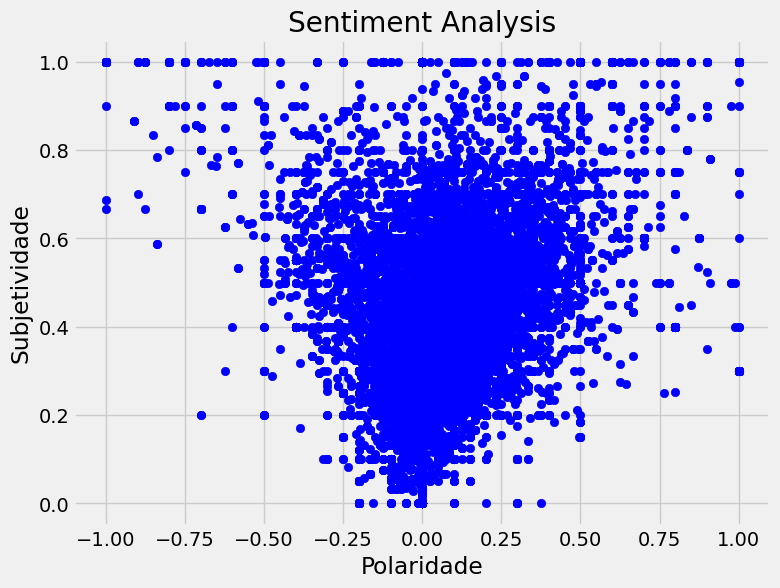

In [23]:
# plot polaridade e subjetividade
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polaridade')
plt.ylabel('Subjetividade')
plt.show()

In [28]:
# porcentagem de tweets positivo
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweet']

round(ptweets.shape[0]/df.shape[0]*100, 1)

12.6

In [29]:
# porcentagem de tweets negativo
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweet']

round(ntweets.shape[0]/df.shape[0]*100, 1)

4.9

In [30]:
# porcentagem de tweets neutro
neutweets = df[df.Analysis == 'Neutral']
neutweets = neutweets['Tweet']

round(neutweets.shape[0]/df.shape[0]*100, 1)

82.5

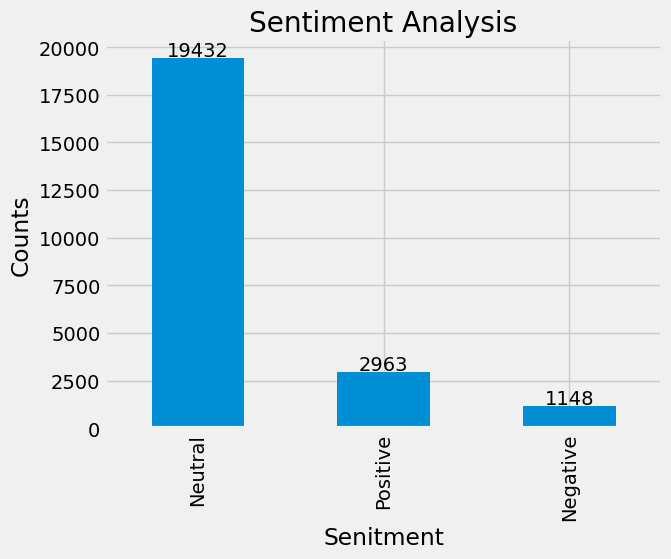

In [39]:
# mostrar a quantidade de resultados
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Senitment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
for index, data in enumerate(df['Analysis'].value_counts()):
    plt.text(x=index, y= data+100, s=f'{data}', ha='center')
plt.show()

In [27]:
df = df.to_csv('dados.csv', index=False)

In [30]:
df.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [17]:
client = MongoClient("mongodb://localhost:27017")


In [20]:
db = client['Twitter']
collection = db['Tweets']
collection.insert_many(df.to_dict())

TypeError: documents must be a non-empty list